In [1]:
## for data
#import datasets
import pandas as pd  #(0.25.1)
import numpy  #(1.16.4)
## for plotting
import matplotlib.pyplot as plt  #(3.1.2)
import seaborn as sns  #(0.9.0)
## for preprocessing
import re
import nltk  #(3.4.5)
import contractions  #(0.0.18)
## for textrank
#import gensim  #(3.8.1)
## for evaluation
import rouge  #(1.0.0)
import difflib
## for seq2seq
from tensorflow.keras import callbacks, models, layers, preprocessing as kprocessing #(2.6.0)
## for bart
import transformers  #(3.0.1)

In [2]:
# encoding: utf-8
## load the full dataset of 300k articles
dataset = pd.read_csv("F:/Higher Study/MSc in Data science/Thesis/Coding/Data/newsdata_1.csv")
dataset.shape

(107642, 7)

In [3]:
dataset = dataset.drop(['id','news_id','category','date', 'title'], axis = 1)

In [4]:
dtf = pd.DataFrame(dataset).rename(columns = {"article":"text", "description":"y"})
dtf.tail(1)

,y,text
107641,রংপুর নগরীর প্রাণকেন্দ্র দিয়ে বয়ে যাওয়া শ্যামা...,রংপুর নগরীর প্রাণকেন্দ্র দিয়ে বয়ে যাওয়া শ্যাম...


In [5]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107642 entries, 0 to 107641
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   y       107641 non-null  object
 1   text    106825 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [6]:
# check
i = 10
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["y"][i])

--- Full text ---
 একুশে পদকপ্রাপ্ত বরেণ্য নজরুল সংগীতশিল্পী ও স্বাধীনতা সংগ্রামের কণ্ঠযোদ্ধা শাহীন সামাদের উপস্থাপনায় আসছে বিজয় দিবস উপলক্ষে বাংলাদেশ টেলিভিশনে প্রচারের জন্য নির্মিত হয়েছে বিজয়ের গানের বিশেষ সংগীতানুষ্ঠান বিজয় নিশান উড়ছে ঐ মাহবুবা ফেরদৌসের প্রযোজনায় অনুষ্ঠানে সংগীত পরিবেশন করেছেন মার্লিন, রাশেদ, অপু, সাব্বির, রন্টি দাশ, লুইপা, প্রিয়াংকা, সুস্মিতা, নন্দিতা ও বাঁধন মার্লিন গান গেয়েছেন জন্ম আমার ধন্য হলো মাগো, সাব্বির গেয়েছেন যে মাটির বুকে ঘুমিয়ে আছে, রাশেদ গেয়েছেন মাগো ভাবনা কেন ও রন্টি গেয়েছেন ও মাঝি নাও ছাইড়া দে মাঝি পাল উড়াইয়া দে অনুষ্ঠানে উপস্থিত ছিলেন সংগীত পরিচালক সুজেয় শ্যাম
 
--- Summary ---
একুশে পদকপ্রাপ্ত বরেণ্য নজরুল সংগীতশিল্পী ও স্বাধীনতা সংগ্রামের কণ্ঠযোদ্ধা শাহীন সামাদের উপস্থাপনায় আসছে বিজয় দিবস উপলক্ষে বাংলাদেশ টেলিভিশনে প্রচারের জন্য নির্মিত হয়েছে বিজয়ের গানের বিশেষ সংগীতানুষ্ঠান বিজয় নিশান উড়ছে ঐ মাহবুবা ফেরদৌসের প্রযোজনায় অনুষ্ঠানে সংগীত পরিবেশন করেছেন মার্লিন, রাশেদ, অপু,


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taskin.khaleque\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taskin.khaleque\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
#Text Analysis
#Text cleaning
#Word frequency
#Length analysis
# Download Indian corpus
nltk.download('indian')

[nltk_data] Downloading package indian to
[nltk_data]     C:\Users\taskin.khaleque\AppData\Roaming\nltk_data...
[nltk_data]   Package indian is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
from nltk.corpus import indian

In [10]:
# Show words from each text
for text in indian.fileids():
    print(text, indian.words(text)[:30])

bangla.pos ['মহিষের', 'সন্তান', ':', 'তোড়া', 'উপজাতি', '৷', 'বাসস্থান-ঘরগৃহস্থালি', 'তোড়া', 'ভাষায়', 'গ্রামকেও', 'বলে', '`', 'মোদ', "'", '৷', 'মোদের', 'আয়তন', 'খুব', 'বড়ো', 'নয়', '৷', 'প্রতি', 'মোদে', 'আছে', 'কিছু', 'কুঁড়েঘর', ',', 'সাধারণ', 'মহিষশালা', '৷']
hindi.pos ['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', 'राष्ट्र', '।', 'इराक', 'के', 'विदेश', 'मंत्री', 'ने', 'अमरीका', 'के', 'उस', 'प्रस्ताव', 'का', 'मजाक', 'उड़ाया', 'है', ',', 'जिसमें', 'अमरीका', 'ने', 'संयुक्त', 'राष्ट्र', 'के', 'प्रतिबंधों', 'को']
marathi.pos ["''", 'सनातनवाद्यांनी', 'व', 'प्रतिगाम्यांनी', 'समाज', 'रसातळाला', 'नेला', 'असताना', 'या', 'अंधारात', 'बाळशास्त्री', 'जांभेकर', 'यांनी', "'दर्पण'च्या", 'माध्यमातून', 'पहिली', 'ज्ञानज्योत', 'तेववली', ',', "''", 'असे', 'प्रतिपादन', 'नटसम्राट', 'प्रभाकर', 'पणशीकर', 'यांनी', 'केले', '.', 'दर्पणकार', 'बाळशास्त्री']
telugu.pos ['4', '.', 'ఆడిట్', 'నిర్వహణ', 'ఆడిటర్', 'ఒక', 'కొత్త', 'ఆడిట్', 'చేపట్టే', 'ముందు', 'సక్రమ', 'పద్ధతి', 'లో', 'కార్య', 'ప్రణాళికను', 'రూపొందించా

In [11]:
def bn_clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    text = str(text)
    # Replace contractions with their longer forms 
    # if True:
    #     text = text.split()
    #     new_text = []
    #     for word in text:
    #         if word in bn_contractions:
    #             new_text.append(bn_contractions[word])
    #         else:
    #             new_text.append(word)
    #     text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;,`%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = text.replace("'","")
    
    text = re.sub(r'\'', ' ', text)
    text = text.replace('\'', ' ')
    text = text.replace('\’', ' ')
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("bengali"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [12]:
## apply function to both text and summaries
dtf["text_clean"] = dtf["text"].apply(lambda x: bn_clean_text(x, remove_stopwords = True))
dtf["y_clean"]    = dtf["y"].apply(lambda y: bn_clean_text(y, remove_stopwords = True))
##dtf["text_clean"] = dtf["text"].apply(lambda x: text_cleaner(x))
##dtf["y_clean"]    = dtf["y"].apply(lambda y: text_cleaner(y))

In [13]:
# check
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["y_clean"][i])

--- Full text ---
একুশে পদকপ্রাপ্ত বরেণ্য নজরুল সংগীতশিল্পী স্বাধীনতা সংগ্রামের কণ্ঠযোদ্ধা শাহীন সামাদের উপস্থাপনায় আসছে বিজয় দিবস উপলক্ষে বাংলাদেশ টেলিভিশনে প্রচারের নির্মিত হয়েছে বিজয়ের গানের সংগীতানুষ্ঠান বিজয় নিশান উড়ছে মাহবুবা ফেরদৌসের প্রযোজনায় অনুষ্ঠানে সংগীত পরিবেশন মার্লিন রাশেদ অপু সাব্বির রন্টি দাশ লুইপা প্রিয়াংকা সুস্মিতা নন্দিতা বাঁধন মার্লিন গান গেয়েছেন জন্ম ধন্য মাগো সাব্বির গেয়েছেন মাটির বুকে ঘুমিয়ে রাশেদ গেয়েছেন মাগো ভাবনা রন্টি গেয়েছেন মাঝি নাও ছাইড়া দে মাঝি পাল উড়াইয়া দে অনুষ্ঠানে উপস্থিত সংগীত পরিচালক সুজেয় শ্যাম
 
--- Summary ---
একুশে পদকপ্রাপ্ত বরেণ্য নজরুল সংগীতশিল্পী স্বাধীনতা সংগ্রামের কণ্ঠযোদ্ধা শাহীন সামাদের উপস্থাপনায় আসছে বিজয় দিবস উপলক্ষে বাংলাদেশ টেলিভিশনে প্রচারের নির্মিত হয়েছে বিজয়ের গানের সংগীতানুষ্ঠান বিজয় নিশান উড়ছে মাহবুবা ফেরদৌসের প্রযোজনায় অনুষ্ঠানে সংগীত পরিবেশন মার্লিন রাশেদ অপু


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count', ylabel='Density'>

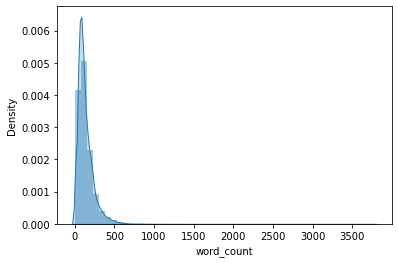

In [14]:
## count for TEXT
dtf['word_count'] = dtf["text_clean"].apply(lambda x: len(nltk.word_tokenize(str(x))) )
## plot
sns.distplot(dtf["word_count"], hist=True, kde=True, kde_kws={"shade":True})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count_y', ylabel='Density'>

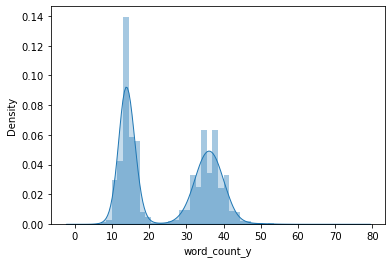

In [15]:
## count for SUMMARY
dtf['word_count_y'] = dtf["y_clean"].apply(lambda x: len(nltk.word_tokenize(str(x))) )
## plot
sns.distplot(dtf["word_count_y"], hist=True, kde=True, kde_kws={"shade":True})

In [16]:
X_len = 300
y_len = 35
#dtf_freq

In [17]:
 def word_freq(corpus, ngrams=[1,2,3], top=10, figsize=(10,7)):
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    ngrams = [ngrams] if type(ngrams) is int else ngrams
    print(ngrams)
    
    ## calculate
    dtf_freq = pd.DataFrame()
    for n in ngrams:
        dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
        dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
        dtf_n["ngrams"] = n
        dtf_freq = dtf_freq.append(dtf_n)
    dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
    dtf_freq = dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
    print(dtf_freq.head(top))
    ## plot
    ##fig, ax = plt.subplots(figsize=figsize)
    ##sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,
    ##            data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(top))
    ##ax.set(xlabel=None, ylabel=None, title="Most frequent words")
    ##ax.grid(axis="x")
    ##plt.show()
    return 

In [18]:
# Find most common words in text
dtf_freq = word_freq(corpus=dtf["text_clean"], ngrams=[1], top=100, figsize=(10,7))


[1]
      word    freq  ngrams
0    হয়েছে  105346       1
1       এক   63892       1
2    গতকাল   60700       1
3      হয়ে   47913       1
4      সময়   44299       1
..     ...     ...     ...
95       ৩   12298       1
96     নাম   12222       1
97  চৌধুরী   12086       1
98     দেয়   12085       1
99  উদ্ধার   12082       1

[100 rows x 3 columns]


<ipython-input-19-296d2565d401>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2489 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2527 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2459 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.

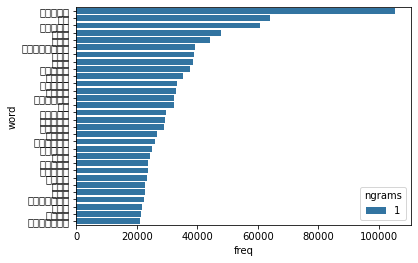

In [19]:
lst_tokens = nltk.tokenize.word_tokenize(dtf["text_clean"].str.cat(sep=" "))
ngrams = [1]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
   dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
   dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=
                        ["word","freq"])
   dtf_n["ngrams"] = n
   dtf_freq = dtf_freq.append(dtf_n)
   dtf_freq["word"] = dtf_freq["word"].apply(lambda x: "".join(string for string in x) )
   dtf_freq_X= dtf_freq.sort_values(["ngrams","freq"], ascending=
                         [True,False])
    
## plot
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()


<ipython-input-20-df99c004c510>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=dtf_freq_s.groupby('ngrams')["ngrams","freq","word"].head(30))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2455 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_ag

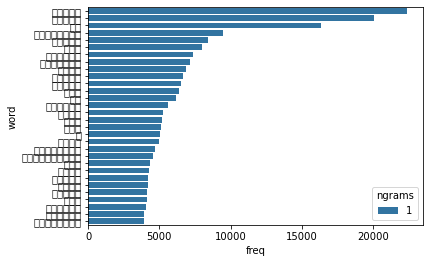

In [20]:
lst_tokens_s = nltk.tokenize.word_tokenize(dtf["y_clean"].str.cat(sep=" "))
ngrams = [1]
    
## calculate
dtf_freq_s = pd.DataFrame()
for n in ngrams:
   dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens_s, n))
   dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=
                        ["word","freq"])
   dtf_n["ngrams"] = n
   dtf_freq_s = dtf_freq_s.append(dtf_n)
   dtf_freq_s["word"] = dtf_freq_s["word"].apply(lambda x: "".join(string for string in x) )
   dtf_freq_y= dtf_freq_s.sort_values(["ngrams","freq"], ascending=
                         [True,False])
    
## plot
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq_s.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()


In [21]:
thres = 5 #<-- min frequency
X_top_words = len(dtf_freq_X[dtf_freq_X["freq"]>thres])
y_top_words = len(dtf_freq_y[dtf_freq_y["freq"]>thres])

print(X_top_words)
print(y_top_words)
#X_top_words = 300
#y_top_words = 100

76110
29716


In [22]:
# Find most common words in summaries
dtf_freq = word_freq(corpus=dtf["y_clean"], ngrams=[1], top=30, figsize=(10,7))

[1]
          word   freq  ngrams
0        গতকাল  22380       1
1        হয়েছে  20031       1
2           এক  16308       1
3     বাংলাদেশ   9463       1
4        জাতীয়   8411       1
5          হয়ে   7963       1
6       আওয়ামী   7373       1
7      উপজেলার   7112       1
8         ঢাকা   6854       1
9        পুলিশ   6641       1
10       দেশের   6497       1
11         সময়   6348       1
12          গত   6150       1
13      হয়েছেন   5603       1
14        দিয়ে   5252       1
15         শেখ   5194       1
16         বছর   5075       1
17           ১   5018       1
18        নামে   4944       1
19    রাজধানীর   4685       1
20  বাংলাদেশের   4580       1
21         কথা   4338       1
22        জেলা   4289       1
23       লীগের   4178       1
24        নিহত   4167       1
25       সাবেক   4136       1
26         তিন   4093       1
27      হিসেবে   4022       1
28      অভিযোগ   3925       1
29    বিরুদ্ধে   3914       1


In [23]:
def add_text_length(data, column):
    dtf = data.copy()
    dtf['word_count'] = dtf[column].apply(lambda x: len(nltk.word_tokenize(str(x))) )
    dtf['char_count'] = dtf[column].apply(lambda x: sum(len(word) for word in nltk.word_tokenize(str(x))) )
    dtf['sentence_count'] = dtf[column].apply(lambda x: len(nltk.sent_tokenize(str(x))) )
    dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']
    dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']
    print(dtf[['char_count','word_count','sentence_count','avg_word_length','avg_sentence_lenght']].describe().T[["min","mean","max"]])
    return dtf

In [24]:
# Texts
X = add_text_length(dtf, "text_clean")

                     min        mean      max
char_count           0.0  790.877446  22029.0
word_count           0.0  132.127264   3776.0
sentence_count       0.0    0.998384      1.0
avg_word_length      1.0    5.982275     14.0
avg_sentence_lenght  1.0  132.341190   3776.0


In [25]:
#plot_distributions(X, x="word_count", figsize=(10,3))

In [26]:
#X_len = 400

In [27]:
# Summaries
y = add_text_length(dtf, "y_clean")

                          min        mean     max
char_count           3.000000  149.543189  269.00
word_count           1.000000   24.634353   76.00
sentence_count       1.000000    1.000000    1.00
avg_word_length      2.105263    6.153039   12.25
avg_sentence_lenght  1.000000   24.634353   76.00


In [28]:
#plot_distributions(y, x="word_count", max_cat=1, figsize=(10,3))

In [29]:
#y_len = 40

In [30]:
dtf = dtf[["text","text_clean","y","y_clean"]]
dtf.head()

,text,text_clean,y,y_clean
0,\n আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে ...,আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে ধনু র...,আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে আপনি ...,আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে ধনু র...
1,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তান...,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তানে...,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তানে...,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তানে...
2,মহান বিজয়ের মাস নিয়ে আপনার অভিব্যক্তি... \nব...,মহান বিজয়ের মাস অভিব্যক্তি বিজয়ের মাসে সবাইকে ...,মহান বিজয়ের মাস নিয়ে আপনার অভিব্যক্তি... বিজ...,মহান বিজয়ের মাস অভিব্যক্তি বিজয়ের মাসে সবাইকে ...
3,তাদের বিয়ে নিয়ে দীর্ঘদিনের জল্পনার অবসান হলো।...,বিয়ে দীর্ঘদিনের জল্পনার অবসান হলো। ইতালির তাস্...,তাদের বিয়ে নিয়ে দীর্ঘদিনের জল্পনার অবসান হলো। ...,বিয়ে দীর্ঘদিনের জল্পনার অবসান হলো। ইতালির তাস্...
4,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে সামনে রেখে...,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে নির্মিত নাট...,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে সামনে রেখে ...,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে নির্মিত নাট...


In [31]:
##Preprocessing
# Partitioning
dtf_train = dtf.iloc[i+1:]
dtf_test = dtf.iloc[:i+1]
dtf_test

,text,text_clean,y,y_clean
0,\n আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে ...,আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে ধনু র...,আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে আপনি ...,আজকের এইদিনে জন্মগ্রহণ করায় পাশ্চাত্যমতে ধনু র...
1,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তান...,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তানে...,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তানে...,ব্রিটিশদের উপনিবেশ বিভাজন নীতির ফসল পাকিস্তানে...
2,মহান বিজয়ের মাস নিয়ে আপনার অভিব্যক্তি... \nব...,মহান বিজয়ের মাস অভিব্যক্তি বিজয়ের মাসে সবাইকে ...,মহান বিজয়ের মাস নিয়ে আপনার অভিব্যক্তি... বিজ...,মহান বিজয়ের মাস অভিব্যক্তি বিজয়ের মাসে সবাইকে ...
3,তাদের বিয়ে নিয়ে দীর্ঘদিনের জল্পনার অবসান হলো।...,বিয়ে দীর্ঘদিনের জল্পনার অবসান হলো। ইতালির তাস্...,তাদের বিয়ে নিয়ে দীর্ঘদিনের জল্পনার অবসান হলো। ...,বিয়ে দীর্ঘদিনের জল্পনার অবসান হলো। ইতালির তাস্...
4,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে সামনে রেখে...,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে নির্মিত নাট...,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে সামনে রেখে ...,১৪ ডিসেম্বর মহান বুদ্ধিজীবী দিবসকে নির্মিত নাট...
5,এই বছরটা দারুণ কাটল ইরফান খানের তার শেষ দুটি ...,বছরটা দারুণ কাটল ইরফান খানের শেষ ছবি হিন্দি মি...,এই বছরটা দারুণ কাটল ইরফান খানের তার শেষ দুটি ছ...,বছরটা দারুণ কাটল ইরফান খানের শেষ ছবি হিন্দি মি...
6,নোলক ছবির পোস্টারের ফার্স্ট লুক প্রকাশ হলো বর...,নোলক ছবির পোস্টারের ফার্স্ট লুক প্রকাশ বর্তমান...,নোলক ছবির পোস্টারের ফার্স্ট লুক প্রকাশ হলো বর্...,নোলক ছবির পোস্টারের ফার্স্ট লুক প্রকাশ বর্তমান...
7,এবার আর সাফটা চুক্তির আওতায় কিংবা রপ্তানির বি...,সাফটা চুক্তির আওতায় রপ্তানির বিনিময়ে ছবি আমদান...,এবার আর সাফটা চুক্তির আওতায় কিংবা রপ্তানির বিন...,সাফটা চুক্তির আওতায় রপ্তানির বিনিময়ে ছবি আমদান...
8,রবীন্দ্রসংগীতশিল্পী অণিমা রায় এবার ভারতের বাং...,রবীন্দ্রসংগীতশিল্পী অণিমা রায় ভারতের বাংলা ছবি...,রবীন্দ্রসংগীতশিল্পী অণিমা রায় এবার ভারতের বাংল...,রবীন্দ্রসংগীতশিল্পী অণিমা রায় ভারতের বাংলা ছবি...
9,আগামীকাল সন্ধ্যা ৭টায় মঞ্চায়ন হবে চারুনীড়ম থি...,আগামীকাল সন্ধ্যা ৭টায় মঞ্চায়ন চারুনীড়ম থিয়েটার...,আগামীকাল সন্ধ্যা ৭টায় মঞ্চায়ন হবে চারুনীড়ম থিয়...,আগামীকাল সন্ধ্যা ৭টায় মঞ্চায়ন চারুনীড়ম থিয়েটার...


In [32]:
'''
Transforms the corpus into an array of sequences of idx (tokenizer) with same length (padding).
:parameter
    :param corpus: list - dtf["text"]
    :param ngrams: num - ex. "new", "york"
    :param grams_join: string - "_" (new_york), " " (new york)
    :param lst_ngrams_detectors: list - [bigram and trigram models], if empty doesn't detect common n-grams
    :param fitted_tokenizer: keras tokenizer - if None it creates one with fit and transorm (train set), if given it transforms only (test set)
    :param top: num - if given the tokenizer keeps only top important words
    :param oov: string - how to encode words not in vocabulary (ex. "NAN")
    :param maxlen: num - dimensionality of the vectors, if None takes the max length in corpus
    :param padding: string - <PAD> token
:return
    If training: matrix of sequences, tokenizer, dic_vocabulary. Else matrix of sequences only.
'''
def text2seq(corpus, ngrams=1, grams_join=" ", lst_ngrams_detectors=[], fitted_tokenizer=None, top=None, oov=None, maxlen=None, padding="<PAD>"):    
    print("--- tokenization ---")
    
    ## detect common n-grams in corpus
    lst_corpus = utils_preprocess_ngrams(corpus, ngrams=ngrams, grams_join=grams_join, lst_ngrams_detectors=lst_ngrams_detectors)

    ## bow with keras to get text2tokens without creating the sparse matrix
    ### train
    if fitted_tokenizer is None:
        tokenizer = kprocessing.text.Tokenizer(num_words=top, lower=False, split=' ', char_level=False, oov_token=oov,
                                               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
        tokenizer.fit_on_texts(lst_corpus)
        dic_vocabulary = {padding:0}
        words = tokenizer.word_index if top is None else dict(list(tokenizer.word_index.items())[0:top+1])
        dic_vocabulary.update(words)
        print(len(dic_vocabulary), "words")
    else:
        tokenizer = fitted_tokenizer
    ### transform
    lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

    ## padding sequence (from [1,2],[3,4,5,6] to [0,0,1,2],[3,4,5,6])
    print("--- padding to sequence ---")
    X = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=maxlen, padding="post", truncating="post")
    print(X.shape[0], "sequences of length", X.shape[1]) 

    ## plot heatmap
    fig, ax = plt.subplots(figsize=(15,5))
    sns.heatmap(X==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title('Sequences Overview')
    plt.show()
    return {"X":X, "tokenizer":tokenizer, "dic_vocabulary":dic_vocabulary} if fitted_tokenizer is None else X



In [33]:
###############################################################################
#                        WORD2VEC (WORD EMBEDDING)                            #
###############################################################################
'''
Create a list of lists of grams with gensim:
    [ ["hi", "my", "name", "is", "Tom"], 
      ["what", "is", "yours"] ]
:parameter
    :param corpus: list - dtf["text"]
    :param ngrams: num - ex. "new", "york"
    :param grams_join: string - "_" (new_york), " " (new york)
    :param lst_ngrams_detectors: list - [bigram and trigram models], if empty doesn't detect common n-grams
:return
    lst of lists of n-grams
'''

def utils_preprocess_ngrams(corpus, ngrams=1, grams_join=" ", lst_ngrams_detectors=[]):
    ## create list of n-grams
    lst_corpus = []
    for string in corpus:
        lst_words = string.split()
        lst_grams = [grams_join.join(lst_words[i:i + ngrams]) for i in range(0, len(lst_words), ngrams)]
        lst_corpus.append(lst_grams)
    
    ## detect common bi-grams and tri-grams
    if len(lst_ngrams_detectors) != 0:
        for detector in lst_ngrams_detectors:
            lst_corpus = list(detector[lst_corpus])
    return lst_corpus

--- tokenization ---
76112 words
--- padding to sequence ---
107631 sequences of length 300


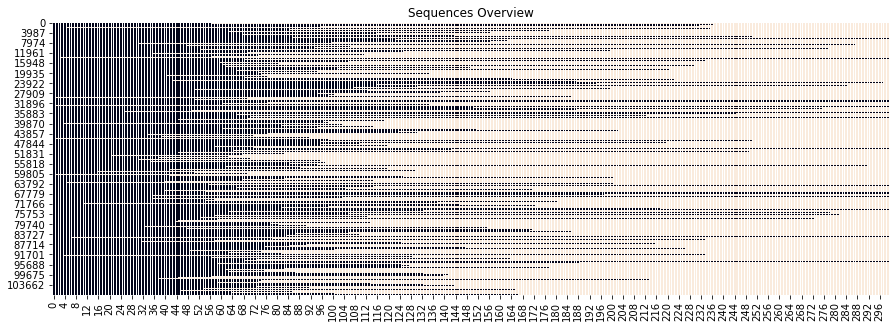

In [34]:
# Create X_train for seq2seq (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], top=X_top_words, maxlen=X_len)

X_train, X_tokenizer, X_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [35]:
dict(list(X_dic_vocabulary.items())[0:6])

{'<PAD>': 0, 'হয়েছে': 1, 'এক': 2, 'গতকাল': 3, 'হয়ে': 4, 'সময়': 5}

--- tokenization ---
--- padding to sequence ---
11 sequences of length 300


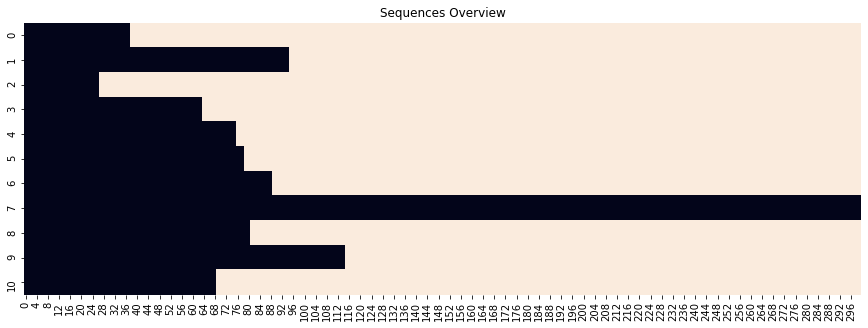

In [36]:
# Preprocess X_test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], fitted_tokenizer=X_tokenizer, maxlen=X_train.shape[1])

In [37]:
# Add START and END tokens to the summaries (y)
special_tokens = ("<START>", "<END>")
dtf_train["y_clean"] = dtf_train['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"] = dtf_test['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"][i]

<ipython-input-37-0e70c5ec9797>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_train["y_clean"] = dtf_train['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
<ipython-input-37-0e70c5ec9797>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_test["y_clean"] = dtf_test['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])


'<START> একুশে পদকপ্রাপ্ত বরেণ্য নজরুল সংগীতশিল্পী স্বাধীনতা সংগ্রামের কণ্ঠযোদ্ধা শাহীন সামাদের উপস্থাপনায় আসছে বিজয় দিবস উপলক্ষে বাংলাদেশ টেলিভিশনে প্রচারের নির্মিত হয়েছে বিজয়ের গানের সংগীতানুষ্ঠান বিজয় নিশান উড়ছে মাহবুবা ফেরদৌসের প্রযোজনায় অনুষ্ঠানে সংগীত পরিবেশন মার্লিন রাশেদ অপু <END>'

--- tokenization ---
29718 words
--- padding to sequence ---
107631 sequences of length 35


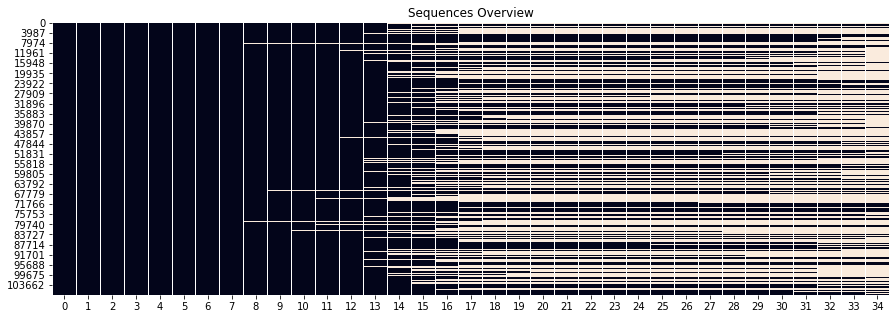

In [38]:
# Tokenize the summaries (y_train)
dic_seq = text2seq(corpus=dtf_train["y_clean"], top=y_top_words, maxlen=y_len)

#y_train, y_tokenizer, y_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [39]:
y_train, y_tokenizer = dic_seq["X"], dic_seq["tokenizer"]

In [40]:
#dict(list(y_dic_vocabulary.items())[0:6])

--- tokenization ---
--- padding to sequence ---
11 sequences of length 35


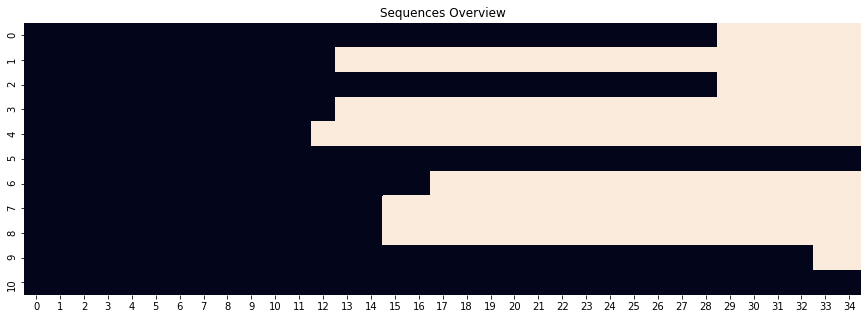

In [41]:
# Preprocess y_test with the same tokenizer
y_test = text2seq(corpus=dtf_test["y_clean"], fitted_tokenizer=y_tokenizer, maxlen=y_train.shape[1])

In [49]:
pip install bnlp_toolkit
from bnlp import BengaliWord2Vec

bwv = BengaliWord2Vec()
model_path = "bengali_word2vec.model"
word = 'গ্রাম'
vector = bwv.generate_word_vector(model_path, word)
print(vector.shape)
print(vector)

  Using cached bnlp_toolkit-3.2.0-py3-none-any.whl (19 kB)
  Using cached gensim-4.0.1-cp38-cp38-win_amd64.whl (23.9 MB)
  Using cached sklearn_crfsuite-0.3.6-py2.py3-none-any.whl (12 kB)
  Using cached sentencepiece-0.1.97-cp38-cp38-win_amd64.whl (1.1 MB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached Cython-0.29.21-cp38-cp38-win_amd64.whl (1.7 MB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.28
    Uninstalling Cython-0.29.28:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\cython-0.29.28.dist-info\\COPYING.txt'
Consider using the `--user` option or check the permissions.



In [46]:
import gensim.downloader as gensim_api

In [57]:
##Create Embedding Weights
# Load pre-trained Word2Vec
#import gensim
nlp = gensim_api.load("glove-wiki-gigaword-300")
##bn_glove.39M.300d
#model = gensim.models.keyedvectors.Word2VecKeyedVectors.load_word2vec_format(model_file)

#nlp = gensim_api.load()
# Or train Word2Vec from scratch
#corpus =  dtf_train["text_clean"].append(dtf_train["y_clean"])
#lst_corpus, nlp = fit_w2v(corpus=corpus, min_count=1, size=300, window=y_avg_len)

In [58]:
# check nlp model
word = "home"
nlp[word].shape

(300,)

In [62]:

'''
Embeds a vocabulary of unigrams with gensim w2v.
:parameter
    :param dic_vocabulary: dict - {"word":1, "word":2, ...}
    :param nlp: gensim model
:return
    Matric and the nlp model
'''
def vocabulary_embeddings(dic_vocabulary, nlp=None):
    nlp = gensim_api.load("glove-wiki-gigaword-300") if nlp is None else nlp
    embeddings = nlp.zeros((len(dic_vocabulary)+1, nlp.vector_size))
    for word,idx in dic_vocabulary.items():
        ## update the row with vector
        try:
            embeddings[idx] =  nlp[word]
        ## if word not in model then skip and the row stays all zeros
        except:
            pass
    print("vocabulary mapped to", embeddings.shape[0], "vectors of size", embeddings.shape[1])
    return embeddings

In [63]:
X_embeddings = vocabulary_embeddings(X_dic_vocabulary, nlp)
X_embeddings.shape

AttributeError: 'KeyedVectors' object has no attribute 'zeros'

In [ ]:
y_embeddings = vocabulary_embeddings(y_dic_vocabulary, nlp)
y_embeddings.shape

In [ ]:
##Model Design
# Basic Seq2Seq
lstm_units = 250
embeddings_size = 300

##------------ ENCODER (embeddings + lstm) -----------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=len(X_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
x_emb = layer_x_emb(x_in)
### lstm 
layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, dropout=0.4,  
                           return_sequences=True, return_state=True)
x_out, state_h, state_c = layer_x_lstm(x_emb)

##------------ DECODER (embeddings + lstm + dense) ---------------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=len(y_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
y_emb = layer_y_emb(y_in)
### lstm 
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, dropout=0.4,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE --------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
# Advanced Seq2Seq
lstm_units = 250

##------------ ENCODER (pre-trained embeddings + 3 bi-lstm) ---------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### bi-lstm 1
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True), 
                                      name="x_lstm_1")
x_out, _, _, _, _ = layer_x_bilstm(x_emb)
### bi-lstm 2
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_2")
x_out, _, _, _, _ = layer_x_bilstm(x_out)
### bi-lstm 3 (here final states are collected)
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4, 
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_3")
x_out, forward_h, forward_c, backward_h, backward_c = layer_x_bilstm(x_out)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])

##------------ DECODER (pre-trained embeddings + lstm + dense) ------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units*2, dropout=0.2, recurrent_dropout=0.2,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE ------------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

model.summary()

In [61]:

###############################################################################
#                             SEQ2SEQ                                         #
###############################################################################
'''
Fits a keras seq2seq model.
:parameter
    :param X_train: array of sequences
    :param y_train: array of sequences
    :param model: model object - model to fit (before fitting)
    :param X_embeddings: array of weights - shape (len_vocabulary x 300)
    :param y_embeddings: array of weights - shape (len_vocabulary x 300)
    :param build_encoder_decoder: logic - if True returns prediction encoder-decoder
:return
    fitted model, encoder + decoder (if model is noy given)
'''
def fit_seq2seq(X_train, y_train, model=None, X_embeddings=None, y_embeddings=None, build_encoder_decoder=True, epochs=100, batch_size=64, verbose=1):    
    ## model
    if model is None:
        ### params
        len_vocabulary_X, embeddings_dim_X = X_embeddings.shape
        len_vocabulary_y, embeddings_dim_y = y_embeddings.shape
        lstm_units = 250
        max_seq_lenght = X_train.shape[1]
        ### encoder (embedding + lstm)
        x_in = layers.Input(name="x_in", shape=(max_seq_lenght,))
        layer_x_emb = layers.Embedding(name="x_emb", input_dim=len_vocabulary_X, output_dim=embeddings_dim_X, 
                                       weights=[X_embeddings], trainable=False)
        x_emb = layer_x_emb(x_in)
        layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, return_sequences=True, return_state=True)
        x_out, state_h, state_c = layer_x_lstm(x_emb)
        ### decoder (embedding + lstm + dense)
        y_in = layers.Input(name="y_in", shape=(None,))
        layer_y_emb = layers.Embedding(name="y_emb", input_dim=len_vocabulary_y, output_dim=embeddings_dim_y, 
                                       weights=[y_embeddings], trainable=False)
        y_emb = layer_y_emb(y_in)
        layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, return_sequences=True, return_state=True)
        y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
        layer_dense = layers.TimeDistributed(name="dense", 
                                             layer=layers.Dense(units=len_vocabulary_y, activation='softmax'))
        y_out = layer_dense(y_out)
        ### compile
        model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
        model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        print(model.summary())
        
    ## train
    training = model.fit(x=[X_train, y_train[:,:-1]], 
                         y=y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:,1:],
                         batch_size=batch_size, epochs=epochs, shuffle=True, verbose=verbose, validation_split=0.3,
                         callbacks=[callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)])
    if epochs > 1:
        utils_plot_keras_training(training)
    
    ## build prediction enconder-decoder model
    if build_encoder_decoder is True:
        lstm_units = lstm_units*2 if any("Bidirectional" in str(layer) for layer in model.layers) else lstm_units
        ### encoder
        encoder_model = models.Model(inputs=x_in, outputs=[x_out, state_h, state_c], name="Prediction_Encoder")
        ### decoder
        encoder_out = layers.Input(shape=(max_seq_lenght, lstm_units))
        state_h, state_c = layers.Input(shape=(lstm_units,)), layers.Input(shape=(lstm_units,))
        y_emb2 = layer_y_emb(y_in)
        y_out2, new_state_h, new_state_c = layer_y_lstm(y_emb2, initial_state=[state_h, state_c])
        predicted_prob = layer_dense(y_out2) 
        decoder_model = models.Model(inputs=[y_in, encoder_out, state_h, state_c], 
                                     outputs=[predicted_prob, new_state_h, new_state_c], 
                                     name="Prediction_Decoder")
        return training.model, encoder_model, decoder_model
    else:
        return training.model



In [ ]:
#Train
# This takes a while
model = fit_seq2seq(X_train, y_train, model, build_encoder_decoder=False, 
                    epochs=100, batch_size=64, verbose=1)
#model, encoder_model, decoder_model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
#                                                  build_encoder_decoder=True, epochs=100, batch_size=64)

In [ ]:
#Test
# Prediction Encoder
encoder_model = models.Model(inputs=x_in, outputs=[x_out, state_h, state_c], name="Prediction_Encoder")
encoder_model.summary()

In [ ]:
# Prediction Decoder
## double the lstm units if you used bidirectional lstm
lstm_units = lstm_units*2 if any("Bidirectional" in str(layer) for layer in model.layers) else lstm_units

## states of the previous time step
x_out2 = layers.Input(shape=(X_train.shape[1], lstm_units))
state_h, state_c = layers.Input(shape=(lstm_units,)), layers.Input(shape=(lstm_units,))

## decoder embeddings
y_emb2 = layer_y_emb(y_in)

## lstm to predict the next word
y_out2, new_state_h, new_state_c = layer_y_lstm(y_emb2, initial_state=[state_h, state_c])

## softmax to generate probability distribution over the target vocabulary
probs = layer_dense(y_out2)

## compile
decoder_model = models.Model(inputs=[y_in, x_out2, state_h, state_c], 
                             outputs=[probs, new_state_h, new_state_c],
                             name="Prediction_Decoder")
decoder_model.summary()

In [ ]:
predicted = predict_seq2seq(X_test, encoder_model, decoder_model, y_tokenizer, special_tokens)

In [ ]:
# Evaluate
evaluate_summary(dtf_test["y_clean"][i], predicted[i]) 

In [ ]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [ ]:
# Explainability
match = display_string_matching(dtf_test["text_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [ ]:
# Predict
max_seq_lenght = X_test.shape[1]
predicted = []
for x in X_test:
   x = x.reshape(1,-1)
   ## encode X
   encoder_out, state_h, state_c = encoder_model.predict(x)
   ## prepare loop
   y_in = np.array([fitted_tokenizer.word_index[special_tokens[0]]])
   predicted_text = ""
   stop = False
   while not stop:
        ## predict dictionary probability distribution
        probs, new_state_h, new_state_c = decoder_model.predict(
                          [y_in, encoder_out, state_h, state_c])
        
        ## get predicted word
        voc_idx = np.argmax(probs[0,-1,:])
        pred_word = fitted_tokenizer.index_word[voc_idx]
        
        ## check stop
        if (pred_word != special_tokens[1]) and 
           (len(predicted_text.split()) < max_seq_lenght):
            predicted_text = predicted_text +" "+ pred_word
        else:
            stop = True
        
        ## next
        y_in = np.array([voc_idx])
        state_h, state_c = new_state_h, new_state_c
   predicted_text = predicted_text.replace(
                    special_tokens[0],"").strip()
   predicted.append(predicted_text)